<a href="https://colab.research.google.com/github/Hyun-ho-Lee/Kaggle-and-Project/blob/master/%EB%B9%85%EC%BD%98_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC(09_13).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


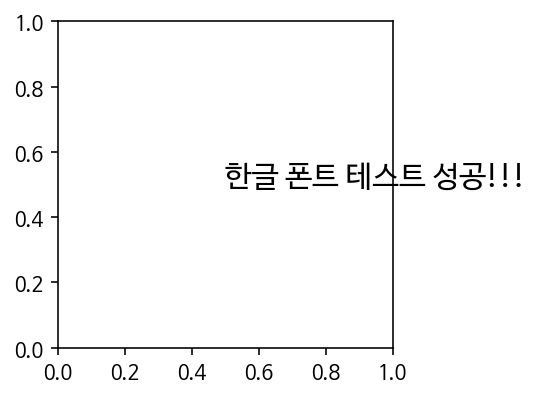

In [1]:
# 그래프 한글폰트 사용설정 in Colab - 한번 실행 후 폰트가 깨진다면 런타임 다시시작 후 한번 더 실행

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '("/content/drvie/MyDrive/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
plt.style.use("ggplot")
warnings.filterwarnings('ignore')
import os 
from google.colab import drive
drive.mount('/content/drvie/')
df= pd.read_excel("/content/drvie/MyDrive/빅콘데이터/빅콘제공전체데이터.xlsx")
TOTAL = pd.read_excel("/content/drvie/MyDrive/빅콘데이터/TOTAL데이터.xlsx")
KG = pd.read_excel("/content/drvie/MyDrive/빅콘데이터/금액중량데이터.xlsx")

Drive already mounted at /content/drvie/; to attempt to forcibly remount, call drive.mount("/content/drvie/", force_remount=True).


In [3]:
df = df.drop(['P_TYPE','CTRY_2','CATEGORY_1','CATEGORY_2'],axis=1)
df

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,중국,판매용,흰다리새우,"냉동,살,자숙",7.202863
1,2015-12-28,중국,판매용,흰다리새우,"냉동,살",6.972132
2,2015-12-28,페루,판매용,흰다리새우,냉동,6.100000
3,2015-12-28,태국,판매용,흰다리새우,"냉동,살,자숙",13.377047
4,2015-12-28,태국,판매용,흰다리새우,"냉동,살",15.050566
...,...,...,...,...,...,...
7794,2020-12-28,베트남,판매용,흰다리새우,"냉동,살",7.410000
7795,2020-12-28,노르웨이,판매용,연어,"냉장,필렛(F)",15.290000
7796,2020-12-28,중국,판매용,오징어,냉동,3.150000
7797,2020-12-28,노르웨이,자사제품제조용,연어,"냉장,필렛(F)",14.260000


In [4]:
TOTAL.columns =['REG_DATE','CTRY_1','CTRY_2','P_PURPOSE','P_IMPORT_TYPE','TOTAL_P','TOTAL_KG','P_PRICE']
TOTAL

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,P_IMPORT_TYPE,TOTAL_P,TOTAL_KG,P_PRICE
0,2015-12-28,노르웨이,노르웨이,자사제품제조용,연어(냉장),46217,5502,8.400036
1,2015-12-28,노르웨이,노르웨이,자사제품제조용,"연어(냉장,필렛(F))",701298,52235,13.425826
2,2015-12-28,노르웨이,노르웨이,판매용,연어(냉장),2266692,256289,8.844281
3,2015-12-28,노르웨이,노르웨이,판매용,"연어(냉장,포장횟감,필렛(F))",25963,1356,19.146755
4,2015-12-28,노르웨이,노르웨이,판매용,"연어(냉장,필렛(F))",35421,2738,12.936815
...,...,...,...,...,...,...,...,...
11720,2020-12-28,페루,페루,판매용,"오징어(냉동,지느러미)",414707,311902,1.329607
11721,2020-12-28,페루,페루,판매용,흰다리새우(냉동),774250,126000,6.144841
11722,2020-12-28,호주,아르헨티나,자사제품제조용,연어(냉장),28764,3196,9.000000
11723,2020-12-28,호주,호주,자사제품제조용,연어(냉장),57253,6361,9.000629


In [5]:
KG.columns=['REG_DATE','CTRY_1','CTRY_2','P_PURPOSE','P_IMPORT_TYPE','P_PRICE','P_KG','월요일']
KG = KG.drop(['월요일'],axis=1)

In [6]:
KG['P_IMPORT_TYPE']=KG['P_IMPORT_TYPE'].astype('str')

In [7]:
data=[TOTAL,KG]

for i in data :
  i['P_IMPORT_TYPE']=i['P_IMPORT_TYPE'].astype('str')
  i['P_NAME']=i['P_IMPORT_TYPE'].str.slice(start=0, stop=2)

In [8]:
KG

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,P_IMPORT_TYPE,P_PRICE,P_KG,P_NAME
0,2015-12-28,캐나다,캐나다,판매용,연어(냉장),1967,271,연어
1,2015-12-28,칠레,칠레,판매용,"오징어(냉동,동체)",48000,48000,오징
2,2015-12-28,칠레,칠레,판매용,"오징어(냉동,지느러미)",40080,48000,오징
3,2015-12-28,중국,중국,판매용,"오징어(냉동,동체)",29328,33475,오징
4,2015-12-28,중국,중국,판매용,"오징어(냉동,동체,자숙)",42625,15500,오징
...,...,...,...,...,...,...,...,...
27005,2020-12-31,페루,페루,판매용,"오징어(냉동,다리)",192150,89800,오징
27006,2020-12-31,페루,페루,판매용,"오징어(냉동,지느러미)",41850,44050,오징
27007,2020-12-31,태국,태국,판매용,"흰다리새우(냉동,살)",124877,10460,흰다
27008,2020-12-31,대만,대만,판매용,오징어(냉동),840179,240051,오징


In [9]:
TOTAL

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,P_IMPORT_TYPE,TOTAL_P,TOTAL_KG,P_PRICE,P_NAME
0,2015-12-28,노르웨이,노르웨이,자사제품제조용,연어(냉장),46217,5502,8.400036,연어
1,2015-12-28,노르웨이,노르웨이,자사제품제조용,"연어(냉장,필렛(F))",701298,52235,13.425826,연어
2,2015-12-28,노르웨이,노르웨이,판매용,연어(냉장),2266692,256289,8.844281,연어
3,2015-12-28,노르웨이,노르웨이,판매용,"연어(냉장,포장횟감,필렛(F))",25963,1356,19.146755,연어
4,2015-12-28,노르웨이,노르웨이,판매용,"연어(냉장,필렛(F))",35421,2738,12.936815,연어
...,...,...,...,...,...,...,...,...,...
11720,2020-12-28,페루,페루,판매용,"오징어(냉동,지느러미)",414707,311902,1.329607,오징
11721,2020-12-28,페루,페루,판매용,흰다리새우(냉동),774250,126000,6.144841,흰다
11722,2020-12-28,호주,아르헨티나,자사제품제조용,연어(냉장),28764,3196,9.000000,연어
11723,2020-12-28,호주,호주,자사제품제조용,연어(냉장),57253,6361,9.000629,연어


In [10]:
squid_TOTAL = TOTAL[TOTAL['P_NAME'] == "오징"]
squid_TOTAL['P_NAME']=squid_TOTAL['P_IMPORT_TYPE'].str.slice(start=0, stop=3)
salmon_TOTAL = TOTAL[TOTAL['P_NAME'] == "연어"]
salmon_TOTAL['P_NAME']=salmon_TOTAL['P_IMPORT_TYPE'].str.slice(start=0, stop=2)
shrimp_TOTAL = TOTAL[TOTAL['P_NAME'] == "흰다"]
shrimp_TOTAL['P_NAME']=shrimp_TOTAL['P_IMPORT_TYPE'].str.slice(start=0, stop=5)

In [11]:
salmon_TOTAL['P_IMPORT_TYPE']=salmon_TOTAL['P_IMPORT_TYPE'].str.replace(pat=r'[연어()]', repl= r' ', regex=True)
salmon_TOTAL['P_IMPORT_TYPE']=salmon_TOTAL['P_IMPORT_TYPE'].str.replace(pat=r'[F]', repl= r'(F) ', regex=True)
salmon_TOTAL['P_IMPORT_TYPE']=salmon_TOTAL['P_IMPORT_TYPE'].str.replace(pat=r'[ ]', repl= r'', regex=True)
salmon_TOTAL

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,P_IMPORT_TYPE,TOTAL_P,TOTAL_KG,P_PRICE,P_NAME
0,2015-12-28,노르웨이,노르웨이,자사제품제조용,냉장,46217,5502,8.400036,연어
1,2015-12-28,노르웨이,노르웨이,자사제품제조용,"냉장,필렛(F)",701298,52235,13.425826,연어
2,2015-12-28,노르웨이,노르웨이,판매용,냉장,2266692,256289,8.844281,연어
3,2015-12-28,노르웨이,노르웨이,판매용,"냉장,포장횟감,필렛(F)",25963,1356,19.146755,연어
4,2015-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F)",35421,2738,12.936815,연어
...,...,...,...,...,...,...,...,...,...
11686,2020-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F)",483736,31629,15.294066,연어
11687,2020-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F),횟감",67217,4597,14.621927,연어
11722,2020-12-28,호주,아르헨티나,자사제품제조용,냉장,28764,3196,9.000000,연어
11723,2020-12-28,호주,호주,자사제품제조용,냉장,57253,6361,9.000629,연어


In [12]:
shrimp_TOTAL['P_IMPORT_TYPE']=shrimp_TOTAL['P_IMPORT_TYPE'].str.replace(pat=r'[흰다리새우()]', repl= r' ', regex=True)
shrimp_TOTAL['P_IMPORT_TYPE']=shrimp_TOTAL['P_IMPORT_TYPE'].str.replace(pat=r'[ ]', repl= r'', regex=True)
shrimp_TOTAL.P_IMPORT_TYPE.unique()

array(['냉동', '냉동,자숙', '냉동,살', '냉동,살,자숙', '냉동,살,자숙,포장횟감', '냉동,살,포장횟감',
       '냉장', '냉동,자숙,횟감'], dtype=object)

In [13]:
squid_TOTAL['P_IMPORT_TYPE']=squid_TOTAL['P_IMPORT_TYPE'].str.replace(pat=r'[오징어()]', repl= r'', regex=True)
squid_TOTAL['P_IMPORT_TYPE']=squid_TOTAL['P_IMPORT_TYPE'].str.replace(pat=r' ', repl= r'', regex=True)
squid_TOTAL

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,P_IMPORT_TYPE,TOTAL_P,TOTAL_KG,P_PRICE,P_NAME
6,2015-12-28,대만,대만,판매용,"냉동,동체",728670,366166,1.989999,오징어
7,2015-12-28,대한민국,중국,판매용,냉동,13500,7500,1.800000,오징어
19,2015-12-28,중국,중국,판매용,"냉동,동체",102768,129475,0.793729,오징어
20,2015-12-28,중국,중국,판매용,"냉동,동체,자숙",42625,15500,2.750000,오징어
23,2015-12-28,칠레,칠레,자사제품제조용,"냉동,다리",4440,3700,1.200000,오징어
...,...,...,...,...,...,...,...,...,...
11712,2020-12-28,칠레,칠레,판매용,"냉동,동체",47970,24600,1.950000,오징어
11717,2020-12-28,페루,페루,판매용,"냉동,다리",291050,134800,2.159125,오징어
11718,2020-12-28,페루,페루,판매용,"냉동,동체",104392,74713,1.397240,오징어
11719,2020-12-28,페루,페루,판매용,"냉동,동체,자숙",1222340,419600,2.913108,오징어


In [14]:
TOTAL = pd.concat([salmon_TOTAL,shrimp_TOTAL,squid_TOTAL])
TOTAL = TOTAL.drop(['CTRY_2'],axis=1)
TOTAL

,REG_DATE,CTRY_1,P_PURPOSE,P_IMPORT_TYPE,TOTAL_P,TOTAL_KG,P_PRICE,P_NAME
0,2015-12-28,노르웨이,자사제품제조용,냉장,46217,5502,8.400036,연어
1,2015-12-28,노르웨이,자사제품제조용,"냉장,필렛(F)",701298,52235,13.425826,연어
2,2015-12-28,노르웨이,판매용,냉장,2266692,256289,8.844281,연어
3,2015-12-28,노르웨이,판매용,"냉장,포장횟감,필렛(F)",25963,1356,19.146755,연어
4,2015-12-28,노르웨이,판매용,"냉장,필렛(F)",35421,2738,12.936815,연어
...,...,...,...,...,...,...,...,...
11712,2020-12-28,칠레,판매용,"냉동,동체",47970,24600,1.950000,오징어
11717,2020-12-28,페루,판매용,"냉동,다리",291050,134800,2.159125,오징어
11718,2020-12-28,페루,판매용,"냉동,동체",104392,74713,1.397240,오징어
11719,2020-12-28,페루,판매용,"냉동,동체,자숙",1222340,419600,2.913108,오징어


In [15]:
full_data = pd.merge(df,TOTAL,how='inner',on = ['REG_DATE','CTRY_1','P_PURPOSE','P_IMPORT_TYPE','P_NAME'])

In [16]:
full_data1 = full_data.copy()

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
col=['CTRY_1','P_PURPOSE','P_IMPORT_TYPE','P_NAME']
for i in col:
  le = LabelEncoder()
  le= le.fit(full_data[i])
  full_data1[i] = le.transform(full_data[i])

full_data1

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE_x,TOTAL_P,TOTAL_KG,P_PRICE_y
0,2015-12-28,20,4,2,10,7.202863,271692,37720,7.202863
1,2015-12-28,20,4,2,9,6.972132,198148,28420,6.972132
2,2015-12-28,26,4,2,1,6.100000,110532,18120,6.100000
3,2015-12-28,24,4,2,10,13.377047,192790,14412,13.377047
4,2015-12-28,24,4,2,9,15.050566,227399,15109,15.050566
...,...,...,...,...,...,...,...,...,...
7902,2020-12-28,9,4,2,9,7.410000,974170,131451,7.410898
7903,2020-12-28,1,4,0,20,15.290000,483736,31629,15.294066
7904,2020-12-28,20,4,1,1,3.150000,2971076,944025,3.147243
7905,2020-12-28,1,3,0,20,14.260000,1493221,104701,14.261764


In [19]:
data = [full_data,full_data1]

for i in data : 
    print(i.CTRY_1.unique())
    print(i.P_PURPOSE.unique())
    print(i.P_IMPORT_TYPE.unique())
    print(i.P_NAME.unique())

['중국' '페루' '태국' '대만' '노르웨이' '사우디아라비아' '에콰도르' '말레이시아' '베트남' '칠레' '캐나다' '인도'
 '인도네시아' '대한민국' '아르헨티나' '러시아' '영국' '아일랜드' '미국' '뉴질랜드' '파나마' '필리핀' '바누아투'
 '아이슬란드' '호주' '콜롬비아' '나미비아' '우루과이' '스페인']
['판매용' '자사제품제조용' '외화획득용 원료' '반송품(기타)' '외화획득용 제품']
['냉동,살,자숙' '냉동,살' '냉동' '냉동,동체' '냉장,필렛(F)' '냉동,살,자숙,포장횟감' '냉동,다리'
 '냉동,살,포장횟감' '냉장,포장횟감,필렛(F)' '냉장' '냉동,동체,자숙' '냉동,지느러미' '냉장,필렛(F),횟감'
 '냉동,자숙' '냉동,다리,자숙' '냉동,지느러미,자숙' '냉동,난포선' '냉동,곤이' '냉동,동체,포장횟감' '냉동,필렛(F)'
 '건조' '냉동,포장횟감,필렛(F)']
['흰다리새우' '오징어' '연어']
[20 26 24  3  1 10 15  6  9 21 22 18 19  4 12  5 16 14  7  2 25 27  8 13
 28 23  0 17 11]
[4 3 1 0 2]
[10  9  1  6 20 11  4 12 19 18  7 14 21 13  5 15  3  2  8 17  0 16]
[2 1 0]


In [20]:
full_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 7906
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   REG_DATE       7907 non-null   datetime64[ns]
 1   CTRY_1         7907 non-null   int64         
 2   P_PURPOSE      7907 non-null   int64         
 3   P_NAME         7907 non-null   int64         
 4   P_IMPORT_TYPE  7907 non-null   int64         
 5   P_PRICE_x      7907 non-null   float64       
 6   TOTAL_P        7907 non-null   int64         
 7   TOTAL_KG       7907 non-null   int64         
 8   P_PRICE_y      7907 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 617.7 KB


# KSUM ,PER

In [21]:
KSUM1=full_data1.groupby(['REG_DATE','P_NAME'])['TOTAL_KG'].agg(**{'KSUM':'sum'}).reset_index()
KSUM1

,REG_DATE,P_NAME,KSUM
0,2015-12-28,0,328859
1,2015-12-28,1,1365441
2,2015-12-28,2,758535
3,2016-01-04,0,376523
4,2016-01-04,1,829188
...,...,...,...
773,2020-12-21,1,2625629
774,2020-12-21,2,556226
775,2020-12-28,0,730115
776,2020-12-28,1,2104596


In [22]:
full_data1=pd.merge(full_data1,KSUM1,on=['REG_DATE','P_NAME'])
full_data1

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE_x,TOTAL_P,TOTAL_KG,P_PRICE_y,KSUM
0,2015-12-28,20,4,2,10,7.202863,271692,37720,7.202863,758535
1,2015-12-28,20,4,2,9,6.972132,198148,28420,6.972132,758535
2,2015-12-28,26,4,2,1,6.100000,110532,18120,6.100000,758535
3,2015-12-28,24,4,2,10,13.377047,192790,14412,13.377047,758535
4,2015-12-28,24,4,2,9,15.050566,227399,15109,15.050566,758535
...,...,...,...,...,...,...,...,...,...,...
7902,2020-12-28,1,3,0,18,8.750000,63135,7217,8.748095,730115
7903,2020-12-28,1,4,0,19,29.740000,30563,1027,29.759494,730115
7904,2020-12-28,1,4,0,20,15.290000,483736,31629,15.294066,730115
7905,2020-12-28,1,3,0,20,14.260000,1493221,104701,14.261764,730115


In [23]:
full_data1['PER'] = full_data1['TOTAL_KG'] / full_data1['KSUM']
full_data1

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE_x,TOTAL_P,TOTAL_KG,P_PRICE_y,KSUM,PER
0,2015-12-28,20,4,2,10,7.202863,271692,37720,7.202863,758535,0.049727
1,2015-12-28,20,4,2,9,6.972132,198148,28420,6.972132,758535,0.037467
2,2015-12-28,26,4,2,1,6.100000,110532,18120,6.100000,758535,0.023888
3,2015-12-28,24,4,2,10,13.377047,192790,14412,13.377047,758535,0.019000
4,2015-12-28,24,4,2,9,15.050566,227399,15109,15.050566,758535,0.019919
...,...,...,...,...,...,...,...,...,...,...,...
7902,2020-12-28,1,3,0,18,8.750000,63135,7217,8.748095,730115,0.009885
7903,2020-12-28,1,4,0,19,29.740000,30563,1027,29.759494,730115,0.001407
7904,2020-12-28,1,4,0,20,15.290000,483736,31629,15.294066,730115,0.043321
7905,2020-12-28,1,3,0,20,14.260000,1493221,104701,14.261764,730115,0.143403


In [27]:
X_train = full_data1[full_data1['REG_DATE'] < '2019-12-31']
X_train

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE_x,TOTAL_P,TOTAL_KG,P_PRICE_y,KSUM,PER
0,2015-12-28,20,4,2,10,7.202863,271692,37720,7.202863,758535,0.049727
1,2015-12-28,20,4,2,9,6.972132,198148,28420,6.972132,758535,0.037467
2,2015-12-28,26,4,2,1,6.100000,110532,18120,6.100000,758535,0.023888
3,2015-12-28,24,4,2,10,13.377047,192790,14412,13.377047,758535,0.019000
4,2015-12-28,24,4,2,9,15.050566,227399,15109,15.050566,758535,0.019919
...,...,...,...,...,...,...,...,...,...,...,...
6325,2019-12-30,6,4,2,1,7.682474,342564,44590,7.682530,596812,0.074714
6326,2019-12-30,24,4,2,18,11.500000,12880,1120,11.500000,596812,0.001877
6327,2019-12-30,15,4,2,1,6.739527,802597,119088,6.739529,596812,0.199540
6328,2019-12-30,9,4,2,10,7.701577,339409,44070,7.701588,596812,0.073842


In [28]:
X_test = full_data1[full_data1['REG_DATE'] >'2020-01-05']
X_test

,REG_DATE,CTRY_1,P_PURPOSE,P_NAME,P_IMPORT_TYPE,P_PRICE_x,TOTAL_P,TOTAL_KG,P_PRICE_y,KSUM,PER
6330,2020-01-06,20,4,1,4,1.940000,93120,48000,1.940000,2337787,0.020532
6331,2020-01-06,26,4,1,6,2.195883,81072,36920,2.195883,2337787,0.015793
6332,2020-01-06,26,4,1,6,2.195883,332869,153540,2.167963,2337787,0.065677
6333,2020-01-06,26,4,1,6,2.167963,81072,36920,2.195883,2337787,0.015793
6334,2020-01-06,26,4,1,6,2.167963,332869,153540,2.167963,2337787,0.065677
...,...,...,...,...,...,...,...,...,...,...,...
7902,2020-12-28,1,3,0,18,8.750000,63135,7217,8.748095,730115,0.009885
7903,2020-12-28,1,4,0,19,29.740000,30563,1027,29.759494,730115,0.001407
7904,2020-12-28,1,4,0,20,15.290000,483736,31629,15.294066,730115,0.043321
7905,2020-12-28,1,3,0,20,14.260000,1493221,104701,14.261764,730115,0.143403


In [24]:
group=full_data1.groupby(['REG_DATE','P_NAME']).sum()
group

CTRY_1  P_PURPOSE  P_IMPORT_TYPE  ...   P_PRICE_y      KSUM  PER
REG_DATE   P_NAME                                    ...                           
2015-12-28 0            5         19             98  ...   66.436061   1644295  1.0
           1          164         32             51  ...   13.536892  10923528  1.0
           2          238         60            114  ...  148.843778  11378025  1.0
2016-01-04 0           29         30            152  ...   96.223796   3012184  1.0
           1          193         30             60  ...   14.297218   6633504  1.0
...                   ...        ...            ...  ...         ...       ...  ...
2020-12-21 1          206         39             55  ...   24.431635  26256290  1.0
           2          164         40             76  ...   98.894428   5562260  1.0
2020-12-28 0           91         35            189  ...  131.735948   7301150  1.0
           1          168         32             43  ...   18.219606  16836768  1.0
           2          174         44             84  ...  118.625676   5512760  1.0

[778 rows x 9 columns]

In [25]:
group['PER'].sum()

778.0

In [26]:
full_data1.to_csv('full_data.csv')

In [38]:
GR=X_train.groupby(['REG_DATE','P_NAME']).sum()
GR

CTRY_1  P_PURPOSE  P_IMPORT_TYPE  ...   P_PRICE_y      KSUM  PER
REG_DATE   P_NAME                                    ...                           
2015-12-28 0            5         19             98  ...   66.436061   1644295  1.0
           1          164         32             51  ...   13.536892  10923528  1.0
           2          238         60            114  ...  148.843778  11378025  1.0
2016-01-04 0           29         30            152  ...   96.223796   3012184  1.0
           1          193         30             60  ...   14.297218   6633504  1.0
...                   ...        ...            ...  ...         ...       ...  ...
2019-12-23 1          169         36             56  ...   26.854055  19122849  1.0
           2          188         52            110  ...  124.744620  12175774  1.0
2019-12-30 0           41         30            152  ...  130.759237   4136768  1.0
           1          306         52             96  ...   41.329626  34770428  1.0
           2          191         48             99  ...  122.524886   7161744  1.0

[622 rows x 9 columns]

In [39]:
GR['PER'].sum()

622.0

In [29]:
salmon_label=full_data1[full_data1['P_NAME'] == 0]
shrimp_label=full_data1[full_data1['P_NAME'] == 1]
squid_label=full_data1[full_data1['P_NAME'] == 2]

In [30]:
salmon=full_data[full_data['P_NAME'] == "연어"]
shrimp=full_data[full_data['P_NAME'] == "흰다리새우"]
squid=full_data[full_data['P_NAME'] == "오징어"]

In [31]:
salmon['P_IMPORT_TYPE'].unique()

array(['냉장,필렛(F)', '냉장,포장횟감,필렛(F)', '냉장,필렛(F),횟감', '냉장', '냉동', '냉동,곤이',
       '냉동,필렛(F)', '냉동,포장횟감,필렛(F)'], dtype=object)

In [32]:
salmon_label['P_IMPORT_TYPE'].unique()

array([20, 19, 21, 18,  1,  2, 17, 16])

In [34]:
squid_label['P_IMPORT_TYPE'].unique()

array([10,  9,  1, 11, 12, 18, 13])

In [36]:
shrimp_label['P_IMPORT_TYPE'].unique()

array([ 6,  4,  7, 14,  1,  5, 15,  3,  8, 13,  0])

In [33]:
salmon_20 = salmon_label[salmon_label["P_IMPORT_TYPE"] == 20]
salmon_19 = salmon_label[salmon_label["P_IMPORT_TYPE"] == 19]
salmon_21 = salmon_label[salmon_label["P_IMPORT_TYPE"] == 21]
salmon_18 = salmon_label[salmon_label["P_IMPORT_TYPE"] == 18]
salmon_1 = salmon_label[salmon_label["P_IMPORT_TYPE"] == 1]
salmon_2 = salmon_label[salmon_label["P_IMPORT_TYPE"] == 2]
salmon_17 = salmon_label[salmon_label["P_IMPORT_TYPE"] == 17]
salmon_16 = salmon_label[salmon_label["P_IMPORT_TYPE"] == 16]

In [35]:
squid_10 = squid_label[squid_label["P_IMPORT_TYPE"] == 10]
squid_9 = squid_label[squid_label["P_IMPORT_TYPE"] == 9]
squid_1 = squid_label[squid_label["P_IMPORT_TYPE"] == 1]
squid_11 = squid_label[squid_label["P_IMPORT_TYPE"] == 11]
squid_12 = squid_label[squid_label["P_IMPORT_TYPE"] == 12]
squid_18 = squid_label[squid_label["P_IMPORT_TYPE"] == 18]
squid_13 = squid_label[squid_label["P_IMPORT_TYPE"] == 13]

In [37]:
shrimp_6 = shrimp_label[shrimp_label["P_IMPORT_TYPE"] == 6]
shrimp_4 = shrimp_label[shrimp_label["P_IMPORT_TYPE"] == 4]
shrimp_7 = shrimp_label[shrimp_label["P_IMPORT_TYPE"] == 7]
shrimp_14 = shrimp_label[shrimp_label["P_IMPORT_TYPE"] == 14]
shrimp_1 = shrimp_label[shrimp_label["P_IMPORT_TYPE"] == 1]
shrimp_5 = shrimp_label[shrimp_label["P_IMPORT_TYPE"] == 5]
shrimp_15 = shrimp_label[shrimp_label["P_IMPORT_TYPE"] == 15]
shrimp_3 = shrimp_label[shrimp_label["P_IMPORT_TYPE"] == 3]
shrimp_8 = shrimp_label[shrimp_label["P_IMPORT_TYPE"] == 8]
shrimp_13 = shrimp_label[shrimp_label["P_IMPORT_TYPE"] == 13]
shrimp_0 = shrimp_label[shrimp_label["P_IMPORT_TYPE"] == 0]